<a href="https://colab.research.google.com/github/neSTORY/MiniProject/blob/master/credit_card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [3]:
# import library
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
import seaborn as sns

In [4]:
file_dir = "/content/drive/MyDrive/Colab Notebooks/dacon/credit_card_users/data"
file_list = os.listdir(file_dir)
file_list

['test.csv', 'train.csv', 'sample_submission.csv']

In [5]:
# load dataset
train = pd.read_csv(file_dir+"/" + file_list[1])
test = pd.read_csv(file_dir + "/" + file_list[0])
submission = pd.read_csv(file_dir + "/" + file_list[2])

## View Dataset

In [6]:
print(train.info(),"\n")
print(test.info(),"\n")
print(submission.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [7]:
# check null values
def check_na(df):
  for k, v in (df.isna().sum()>0).items():
    if v:
      print("['{}'] column has NaN ...!".format(k))
      print("Total number of NaN : {}\n".format(df[k].isna().sum()))

print("="*45)
print("[*] Check Train Dataset ...")
print("="*45)
check_na(train)
print("="*45)
print("[*] Check Test Dataset ...")
print("="*45)
check_na(test)

[*] Check Train Dataset ...
['occyp_type'] column has NaN ...!
Total number of NaN : 8171

[*] Check Test Dataset ...
['occyp_type'] column has NaN ...!
Total number of NaN : 3152



occyp_type column에서 결측치가 있는 것을 확인

In [8]:
# check column's dtype == "object"
def check_dtype(df):
  for k, v in df.dtypes.items():
    if v == "object":
      # print("="*40)
      print("column : [{}] \ncolumn's unique values number : [{:2}]".format(k, df[k].nunique()))
      print("="*40)
    

print("[*] Check the columns in the [train] dataset of which dtype is an object ...\n")
check_dtype(train)
print("\n[*] Check the columns in the [test] dataset of which dtype is an object ...\n")
check_dtype(test)

[*] Check the columns in the [train] dataset of which dtype is an object ...

column : [gender] 
column's unique values number : [ 2]
column : [car] 
column's unique values number : [ 2]
column : [reality] 
column's unique values number : [ 2]
column : [income_type] 
column's unique values number : [ 5]
column : [edu_type] 
column's unique values number : [ 5]
column : [family_type] 
column's unique values number : [ 5]
column : [house_type] 
column's unique values number : [ 6]
column : [occyp_type] 
column's unique values number : [18]

[*] Check the columns in the [test] dataset of which dtype is an object ...

column : [gender] 
column's unique values number : [ 2]
column : [car] 
column's unique values number : [ 2]
column : [reality] 
column's unique values number : [ 2]
column : [income_type] 
column's unique values number : [ 5]
column : [edu_type] 
column's unique values number : [ 5]
column : [family_type] 
column's unique values number : [ 5]
column : [house_type] 
column's 

## EDA

우리의 타겟 컬럼 credit (신용등급)은 0이 제일 좋은 등급이다.

각 컬럼별로 신용등급이 어떠한지 살펴보자.

In [9]:
# 우선 신용등급의 타입이 float인데 object로 변환하자.
train["credit"] = train["credit"].astype("object")

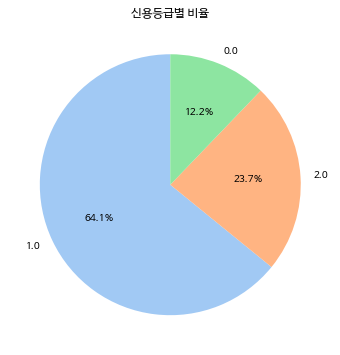

In [10]:
# 신용등급 비율
labels = train["credit"].unique()
plt.figure(figsize=(6,6))
sns.set_palette("pastel")
plt.title("신용등급별 비율")
plt.pie(train["credit"].value_counts(),labels=labels, autopct="%.1f%%",
        startangle=90);

신용등급별 분포는 다음과 같다.
- 0 등급 : 12%
- 1 등급 : 64%
- 2 등급 : 23%

In [11]:
def cnt_plot(col):
  sns.set_style("darkgrid")
  sns.set_palette("RdBu", 2)
  sns.countplot(data = train, y="credit", hue=col);

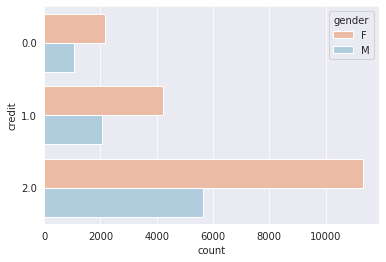

In [12]:
# 성별 신용등급
cnt_plot("gender")

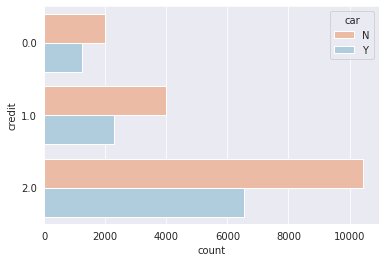

In [13]:
# 자차 소유별 신용등급
cnt_plot("car")

신용등급이 높다고 자차 소유 비율이 높지는 않았다.

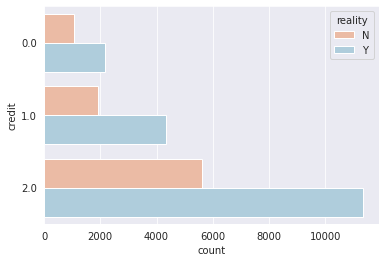

In [14]:
# 부동산 소유별 신용등급
cnt_plot("reality")

부동산은 전체 등급에서 소유한 사람이 많은 것을 확인할 수 있다.

In [15]:
train.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit'],
      dtype='object')

In [16]:
# 자녀 수
train["child_num"].value_counts()

0     18340
1      5386
2      2362
3       306
4        47
5        10
14        3
7         2
19        1
Name: child_num, dtype: int64

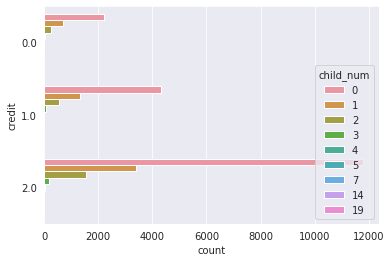

In [17]:
cnt_plot("child_num")
# plt.legend().remove()

각 등급별로 자녀수가 0명이 가장 많은 것을 보아 미혼자들의 수도 꽤 될 것이라 생각된다. 각 등급별로 자녀수의 비율은 비슷한것으로 보인다.

> cf. 자녀 수가 14명, 19명은 좀 충격적이다.. 후에 iqr을 통해 이상치를 제거하자

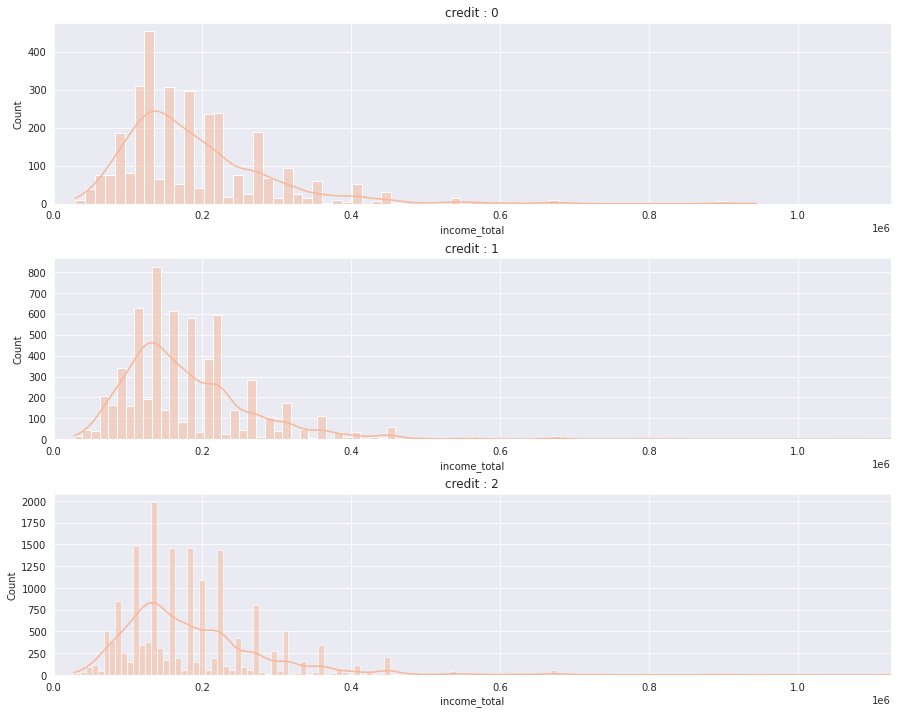

In [158]:
# 신용등급별 소득 분포도
plt.figure(figsize=(15,12))
for i in range(3):
  plt.subplot(3,1,i+1)
  plt.xlim([0, 1.125000e+06])
  plt.title(f"credit : {i}")
  plt.subplots_adjust(hspace=0.3)
  # 신용등급별로 income의 범위가 다르기 때문에 범위 설정을 해줌
  sns.histplot(data=train[train["credit"]==i], x="income_total", kde=True)

신용등급별 소득의 분포도는 비슷해보이는데 좀 더 자세히 보기 위해 겹쳐서 봐보자.

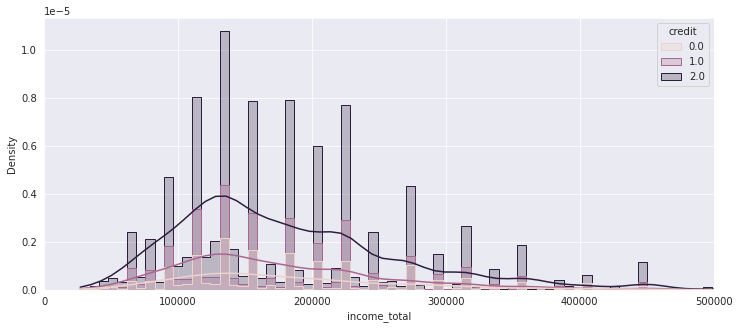

In [19]:
plt.figure(figsize=(12,5))
plt.xlim([0, 5e5])
sns.histplot(data=train, x="income_total", hue="credit", kde=True,
             element="step", stat="density");

신용등급에 따른 소득이 차이가 날 줄 알았는데, 신용등급이 낮다고 꼭 소득이 낮은 것은 아닌걸 확인할 수 있다.

**<u>신용등급별로 소득의 분포는 비슷했다.</u>**

> 소득도 이상치가 존재하는 것을 확인.

In [160]:
# 성별 소득 비교
train.groupby("gender").describe()["income_total"]

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,17697.0,173082.007120,94557.919658,27000.0,112500.0,157500.0,207000.0,1575000.0
M,8760.0,216042.972432,109776.713139,30150.0,135000.0,202500.0,270000.0,1350000.0


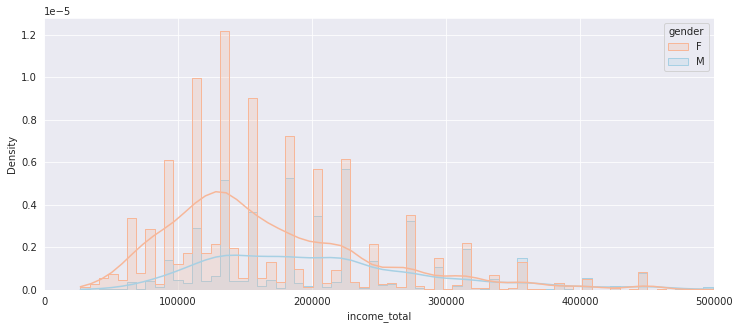

In [159]:
# 성별 소득 비교 시각화
plt.figure(figsize=(12,5))
plt.xlim([0, 5e5])
sns.histplot(data=train, x="income_total", hue="gender", kde=True,
             element="step", stat="density");

In [20]:
# income_type
"""
income type
  - Commercial asscociate : 사업자
  - Working : 재직중
  - State servant : 공무원
  - Pensioner : 연금 수령자
"""

train["income_type"].unique()

array(['Commercial associate', 'Working', 'State servant', 'Pensioner',
       'Student'], dtype=object)

In [21]:
# ~type 컬럼 시각화 함수
def type_plot(col, w=9, h=12):
  plt.figure(figsize=(w,h))
  for i in range(3):
    plt.subplot(3,1,i+1)
    plt.title("credit : {}".format(i))
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(data=train[train["credit"]==i], x=col,
                  order = train[col].unique())

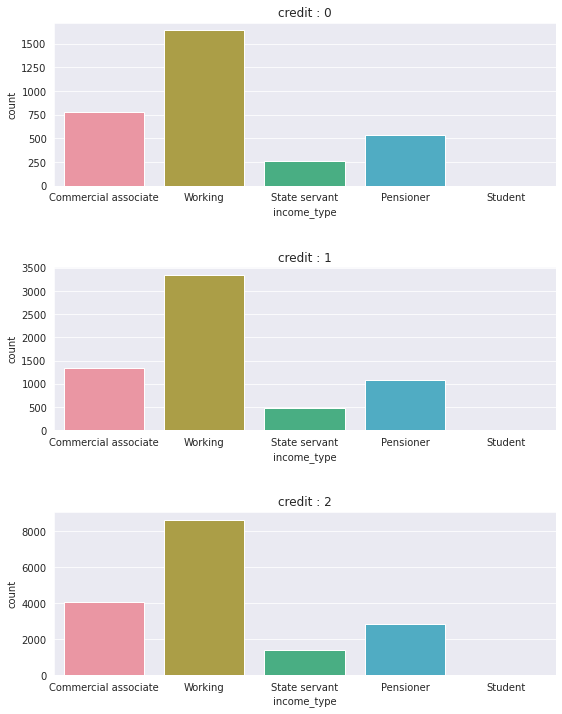

In [22]:
type_plot("income_type")

In [23]:
train[train["income_type"]=="Student"]["income_total"]

2990     171000.0
3602     171000.0
6223     135000.0
8936     171000.0
11646    112500.0
21681    171000.0
23119    112500.0
Name: income_total, dtype: float64

소득 경로의 타입도 신용등급별로 차이가 없다.

신용등급 1, 2에 학생이 껴있는데.. 워낙 적은 수라서 제거하고 싶지만 test데이터에도 학생이 4명 있는 것을 확인했다.

In [24]:
# 소득 경로 별 신용등급과 소득 표
train.groupby(["income_type","credit"]).describe()["income_total"]

count           mean  ...       75%        max
income_type          credit                         ...                     
Commercial associate 0.0      782.0  220844.198210  ...  270000.0   900000.0
                     1.0     1344.0  208437.947545  ...  252000.0  1125000.0
                     2.0     4076.0  221191.932409  ...  270000.0  1575000.0
Pensioner            0.0      536.0  148010.541045  ...  180000.0   540000.0
                     1.0     1084.0  150229.697878  ...  180000.0   594000.0
                     2.0     2829.0  150038.168081  ...  180000.0   742500.0
State servant        0.0      265.0  217682.830189  ...  261000.0   900000.0
                     1.0      489.0  202833.128834  ...  247500.0   990000.0
                     2.0     1400.0  205088.914286  ...  247500.0   990000.0
Student              1.0        3.0  171000.000000  ...  171000.0   171000.0
                     2.0        4.0  132750.000000  ...  144000.0   171000.0
Working              0.0     1639.0  186127.069860  ...  225000.0   945000.0
                     1.0     3347.0  176996.706454  ...  225000.0   900000.0
                     2.0     8659.0  183854.826597  ...  225000.0   945000.0

[14 rows x 8 columns]

소득의 평균은 사업 > 공무원 > 재직 > 학생 > 연금수령 순으로 많았다.

> 학생 중 신용등급이 1인 학생의 분포별로 소득이 똑같은 것을 보아 같은 사람인 것 같다.

In [25]:
train[(train["income_type"]=="Student") & (train["credit"]==1)]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
3602,3602,F,N,Y,0,171000.0,Student,Higher education,Married,House / apartment,-18756,-3904,1,0,0,1,Core staff,2.0,-39.0,1
8936,8936,F,N,Y,0,171000.0,Student,Higher education,Married,House / apartment,-18756,-3904,1,0,0,1,Core staff,2.0,-39.0,1
21681,21681,F,N,Y,0,171000.0,Student,Higher education,Married,House / apartment,-18756,-3904,1,0,0,1,Core staff,2.0,-35.0,1


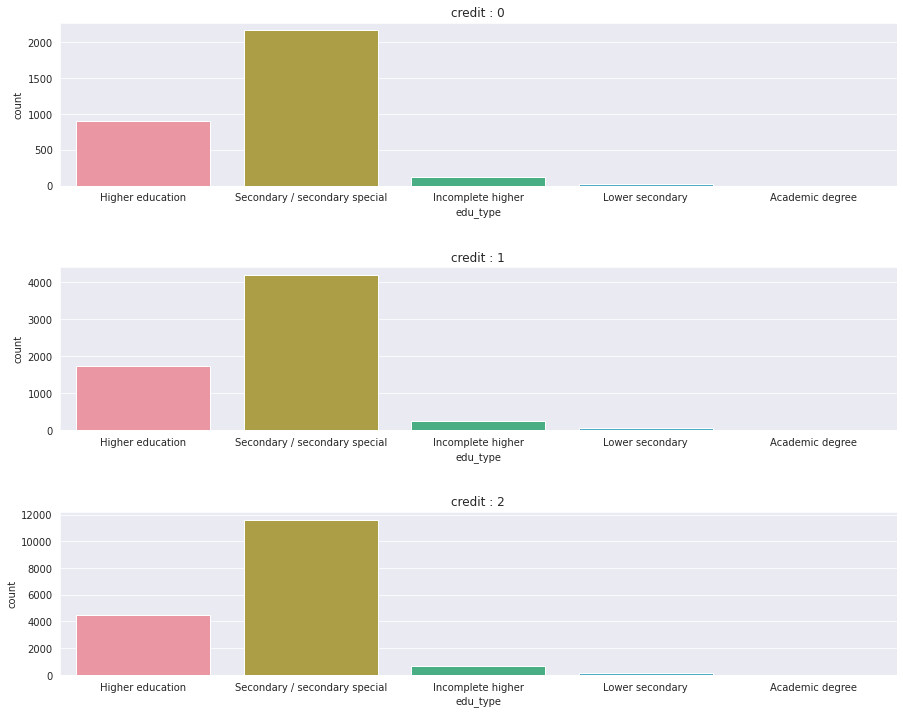

In [26]:
# edu_type
type_plot("edu_type", w=15)

학력 컬럼 또한 신용등급에 따른 차이를 보이지 않는다.

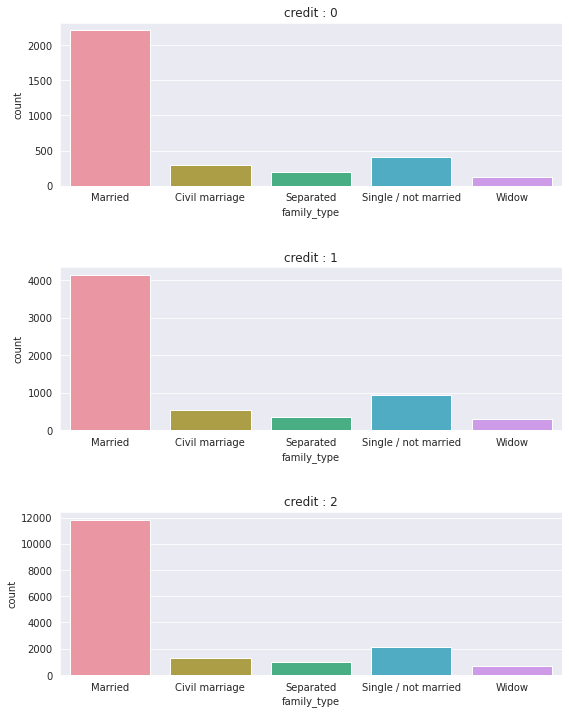

In [27]:
# family_type
type_plot("family_type")

결혼 타입이 5가지인데 각 타입별로 자녀의 수는 어떻게 되는지 확인해보자.

In [28]:
train.family_type.unique()

array(['Married', 'Civil marriage', 'Separated', 'Single / not married',
       'Widow'], dtype=object)

In [29]:
for ft in train.family_type.unique():
  print(ft)
  print(train[(train["family_type"]==ft)]["child_num"].value_counts(),"\n")

Married
0    11828
1     3949
2     2092
3      273
4       43
5        9
7        2
Name: child_num, dtype: int64 

Civil marriage
0    1397
1     564
2     148
3      14
Name: child_num, dtype: int64 

Separated
0     1098
1      368
2       61
4        4
3        4
14       3
5        1
Name: child_num, dtype: int64 

Single / not married
0     2987
1      440
2       56
3       12
19       1
Name: child_num, dtype: int64 

Widow
0    1030
1      65
2       5
3       3
Name: child_num, dtype: int64 



싱글, 미혼에는 자녀의 수가 적을줄 알았는데 그렇게 적은것도 아니었다. 오히려 과부(widow)가 자녀의 수가 가장 적었다.

In [233]:
# 패밀리 타입별 소득 구간
train.groupby("family_type").describe()["income_total"]

,count,mean,std,min,25%,50%,75%,max
family_type,,,,,,,,
Civil marriage,2123.0,183419.722327,91729.125917,27000.0,121500.0,162000.0,225000.0,900000.0
Married,18196.0,187458.950319,103178.387191,27000.0,121500.0,157500.0,225000.0,1350000.0
Separated,1539.0,194372.456140,106305.136486,36000.0,126000.0,166500.0,225000.0,742500.0
Single / not married,3496.0,192407.802632,104817.644073,40500.0,135000.0,180000.0,225000.0,1575000.0
Widow,1103.0,166245.421578,77203.749858,45000.0,112500.0,157500.0,202500.0,720000.0


widow의 평균 수입이 가장 낮은것을 확인할 수 있다.

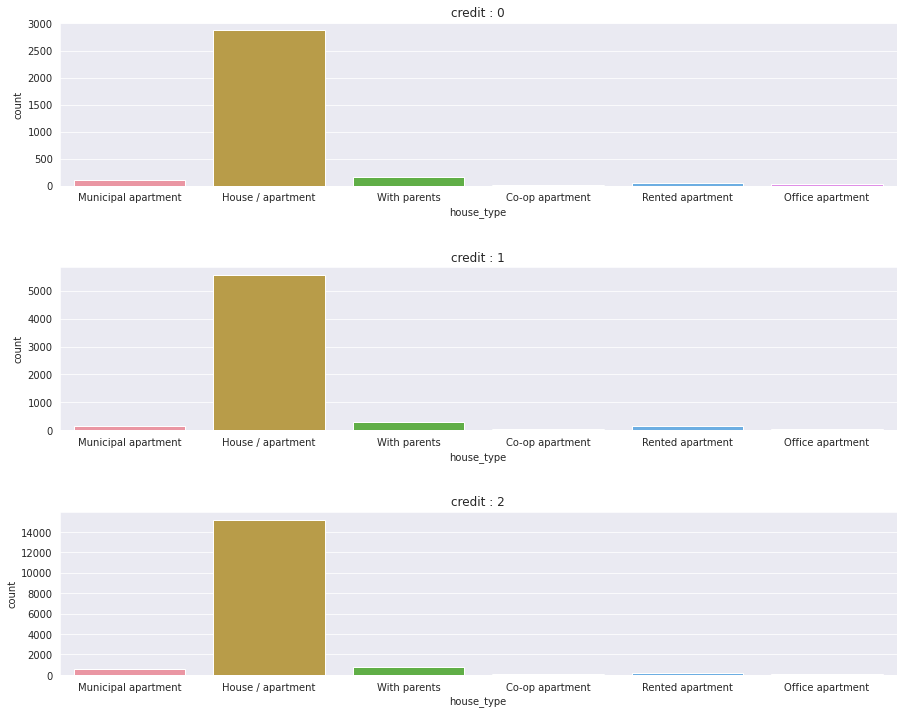

In [31]:
type_plot("house_type", w=15)

거주 타입별로 신용등급의 차이도 없는 듯 하다.. 어떤 컬럼이 신용등급에 따라 차이를 보일지 궁금해진다.

In [34]:
train.groupby("credit").describe()["DAYS_EMPLOYED"]

,count,mean,std,min,25%,50%,75%,max
credit,,,,,,,,
0.0,3222.0,58595.379268,137022.088828,-15072.0,-3141.0,-1526.0,-369.00,365243.0
1.0,6267.0,61103.375140,139116.678086,-15038.0,-2993.0,-1436.0,-401.00,365243.0
2.0,16968.0,58407.164899,136951.402498,-15713.0,-3239.0,-1586.0,-413.75,365243.0


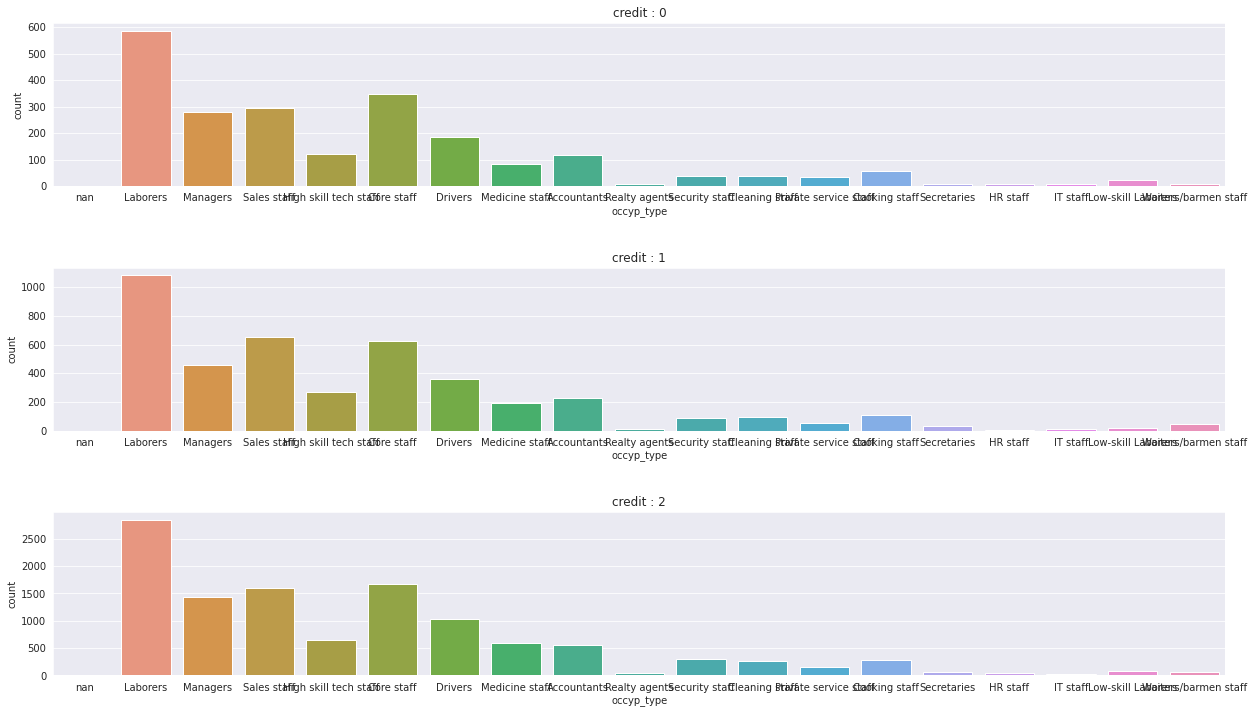

In [40]:
type_plot("occyp_type", w=21)

근무 업종에 따른 신용등급의 분포도 비슷해 보인다. 이렇게 모든 컬럼이 신용등급에 따른 차이가 없다면 분류가 힘들것으로 판단된다.

In [65]:
contact = ['FLAG_MOBIL', 'work_phone', 'phone', 'email']

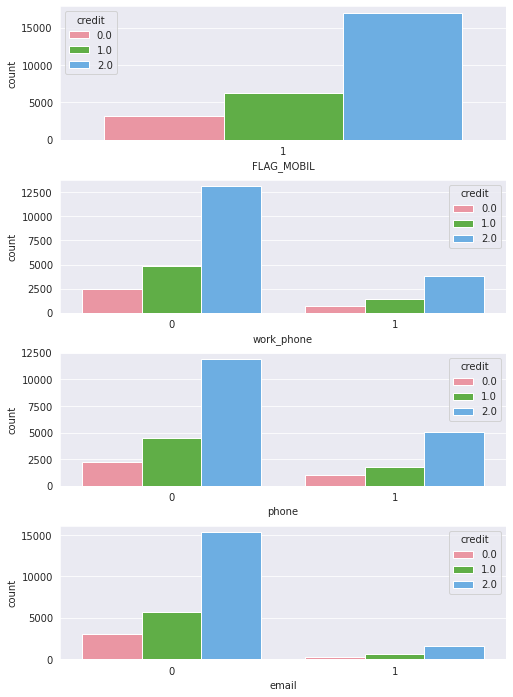

In [70]:
num = 1
plt.figure(figsize=(8,12))
for con in contact:
  plt.subplot(len(contact),1,num)
  plt.subplots_adjust(hspace=0.3)
  sns.countplot(data=train, x=con, hue="credit")
  num +=1

모든 신용카드 사용자들이 핸드폰은 소유하고 있으므로 의미없는 컬럼임을 확인했다. 후에 "FLAG_MOBIL"컬럼은 제거하도록 하자.

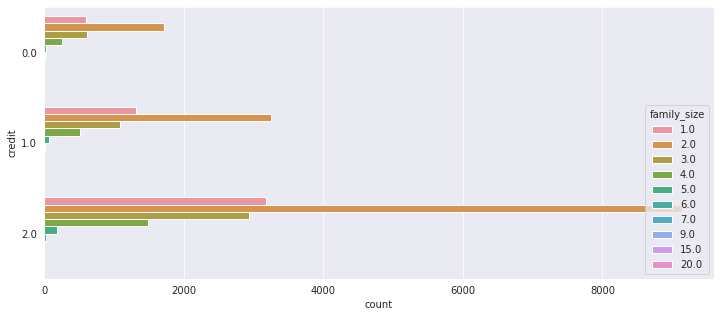

In [72]:
# family_size 
plt.figure(figsize=(12,5))
cnt_plot("family_size")

신용등급별 가족수의 비율을 살펴보자.

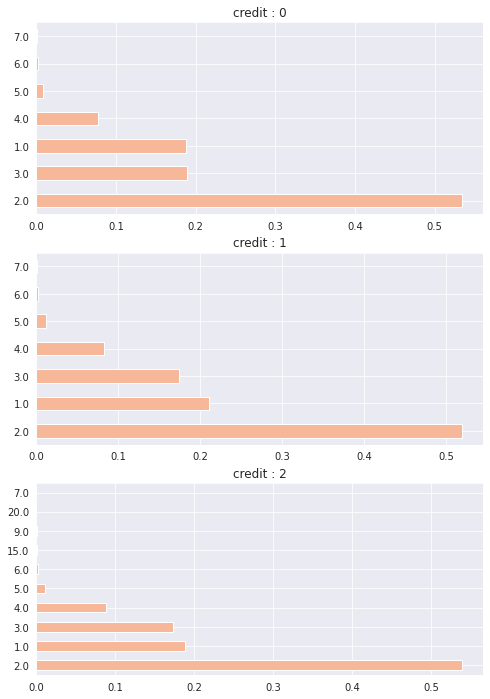

In [108]:
plt.figure(figsize=(8,12))
for i in range(3):
  plt.subplot(3,1,i+1)
  plt.title(f"credit : {i}")
  (train[train["credit"]==i]["family_size"].value_counts() / train[train["credit"]==i]["family_size"].value_counts().sum()).plot(kind="barh",stacked=True)

전체 등급에서 가족수가 2명인 사용자들의 비율이 50%정도 되는 것을 확인했다.

한 가지 차이점은 신용등급이 높은 그룹에서 가족수가 3명인 비율이 좀 높았다.

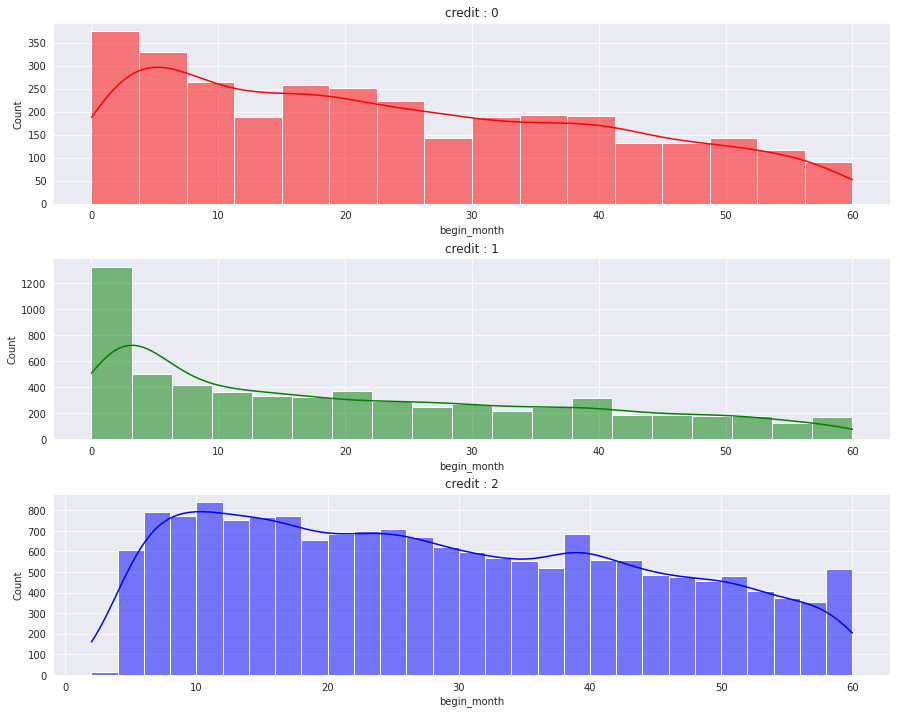

In [124]:
# 신용카드 발급 기간
train["begin_month"] = train["begin_month"].apply(lambda x: abs(x))

# 신용등급별 발급 기간 분포도
plt.figure(figsize=(15,12))
colors = ["r","g","b"]
for i in range(3):
  plt.subplot(3,1,i+1)
  plt.title(f"credit : {i}")
  plt.subplots_adjust(hspace=0.3)
  sns.histplot(data=train[train["credit"]==i], x="begin_month", kde=True, color=colors[i])

신용카드 발급 기간에 따른 신용도의 차이는 있어보인다. 신용등급이 낮은 2등급의 발급기간이 다른 등급 대비 길어보인다.

In [148]:
# occyp_type이 NaN인 사람들과 근무일 그룹의 교집합
print((train["DAYS_EMPLOYED"]>=0).sum())
print((train["occyp_type"].isna()).sum())
print(len(train[(train["occyp_type"].isna()) & (train["DAYS_EMPLOYED"]>=0)]))

4438
8171
4438


"DAYS_EMPLOYED" > 0 이라는 뜻은 근무를 하고 있지 않다는 뜻이므로 occyp_type이 NaN 값을 갖는다.

## Feature Engineering

In [192]:
# 불필요한 컬럼 제거
train.drop(["index", "FLAG_MOBIL"], axis=1, inplace=True)
test.drop(["index", "FLAG_MOBIL"], axis=1, inplace=True)

# 중복 데이터 제거
train.drop_duplicates(inplace=True)

In [ ]:
def feature_engineering(df):
  # id : gender + car + reality
  df["id"] = df["gender"] + "_" + df["car"] + "_" + df["reality"]
  
  # contact : phone + email
  df["contact"] = df["work_phone"].astype(str) + df["phone"].astype(str) + df["email"].astype(str)
  
  # income_size : income_total / family_size
  df["income_size"] = df["income_total"] / df["family_size"]

  # age
  df["age"] = df["DAYS_BIRTH"] // -365

  return df

In [190]:
# 이상치 제거 - child_num
q1 = train["child_num"].quantile(0.25)
q3 = train["child_num"].quantile(0.75)

iqr = (q3 - q1)*5

outlier = train[(train["child_num"] > iqr)].index
train.drop(outlier, axis=0, inplace=True)
train.reset_index(drop=True, inplace=True)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,0,0,0,NaN,2.0,6.0,1
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,0,0,1,Laborers,3.0,5.0,1
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,0,1,0,Managers,2.0,22.0,2
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,0,1,0,Sales staff,2.0,37.0,0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,0,0,0,Managers,2.0,26.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,0,0,0,Core staff,4.0,2.0,1
26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,0,0,0,NaN,2.0,47.0,2
26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,0,0,0,Core staff,2.0,25.0,2
26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,0,0,0,Laborers,1.0,59.0,2


In [209]:
train.columns

Index(['gender', 'car', 'reality', 'child_num', 'income_total', 'income_type',
       'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'work_phone', 'phone', 'email', 'occyp_type', 'family_size',
       'begin_month', 'credit'],
      dtype='object')

In [197]:
train["family_type"].unique()

array(['Married', 'Civil marriage', 'Separated', 'Single / not married',
       'Widow'], dtype=object)

In [ ]:
# convert column's dtype


In [ ]:
train["occyp_type"].unique()

array([nan, 'Laborers', 'Managers', 'Sales staff',
       'High skill tech staff', 'Core staff', 'Drivers', 'Medicine staff',
       'Accountants', 'Realty agents', 'Security staff', 'Cleaning staff',
       'Private service staff', 'Cooking staff', 'Secretaries',
       'HR staff', 'IT staff', 'Low-skill Laborers',
       'Waiters/barmen staff'], dtype=object)